In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


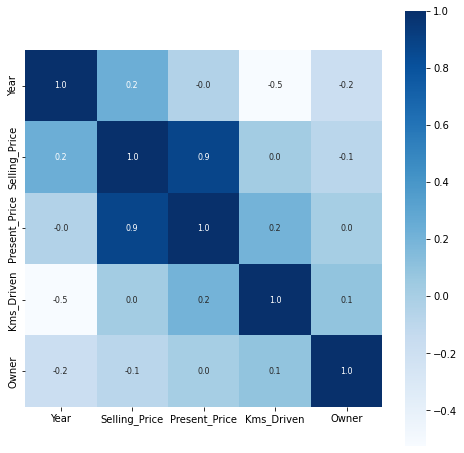

In [5]:
plt.figure(figsize=(8,8))
cor=df.corr()
sns.heatmap(cor,cmap="Blues",square=True,cbar=True,annot=True,fmt='.1f',annot_kws={'size':8});

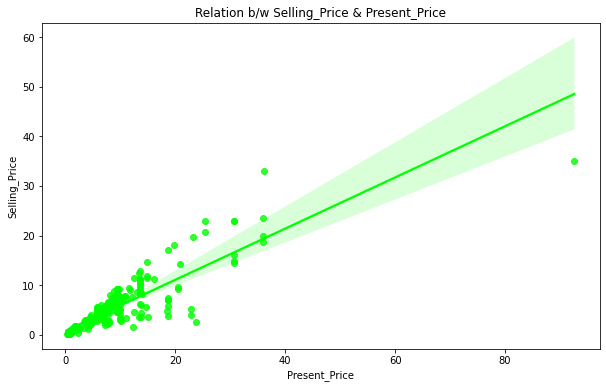

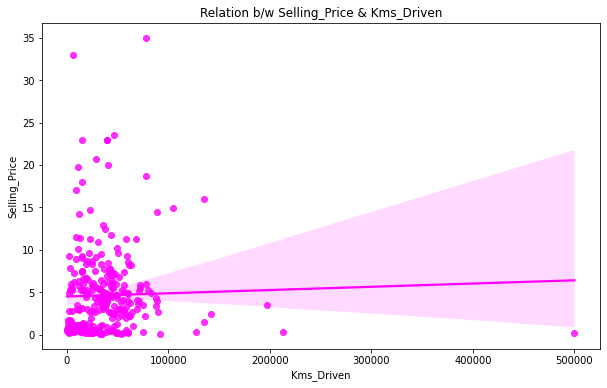

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(x='Present_Price', y='Selling_Price', data=df, color='lime')
plt.title('Relation b/w Selling_Price & Present_Price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.show()


plt.figure(figsize=(10,6))
sns.regplot(x='Kms_Driven', y='Selling_Price', data=df, color='magenta')
plt.title('Relation b/w Selling_Price & Kms_Driven')
plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.show()

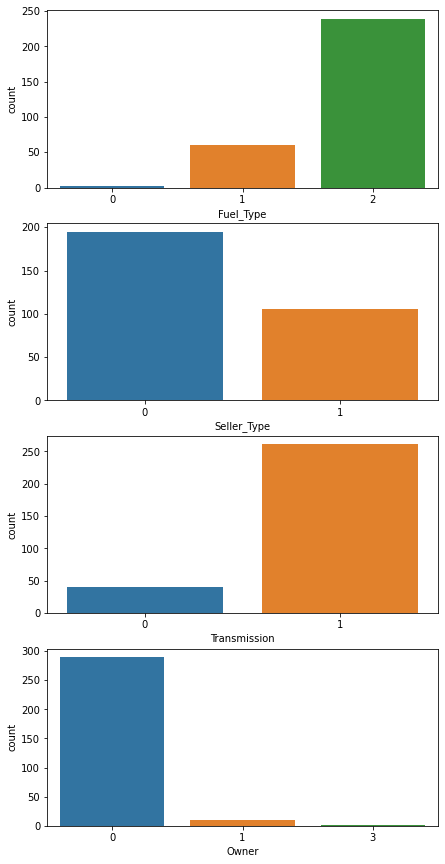

In [21]:
plt.figure(figsize=(7, 15))

plt.subplot(4, 1, 1)
sns.countplot(x="Fuel_Type", data=df)

plt.subplot(4, 1, 2)
sns.countplot(x="Seller_Type", data=df)

plt.subplot(4, 1, 3)
sns.countplot(x="Transmission", data=df)

plt.subplot(4, 1, 4)
sns.countplot(x="Owner", data=df)

plt.show()

In [6]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [24]:
lm = LinearRegression(fit_intercept=True)
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 3.5347190696965822
Mean Absolute Error (MAE): 1.2142339415018644


# Experiment 2

In [31]:
from sklearn.neighbors import KNeighborsRegressor
# Create a KNN regression model with the desired number of neighbors (n_neighbors)
knn = KNeighborsRegressor(n_neighbors=5)
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = knn.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 3.8711620219780216
Mean Absolute Error (MAE): 0.9590769230769232


# Experiment 3

In [37]:
from xgboost import XGBRegressor

# Create an XGBoost regression model
xg = XGBRegressor()
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = xg.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.9130996030665187
Mean Absolute Error (MAE): 0.5874909528533181
